# rxday - gridpoint maximum precipitation rate

Extremes for individual gridboxes (rx1day, rx5day) for time period <br>
rx1day - maximum daily precipitation rate for each gridbox over a time period (1 year) <br>
rx5day - maximum 5 day rolling average precipitation rate for each gridbox over a time period (1 year)

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
from myFuncs import *

### one dataset

In [4]:
metric = 'rxday'

rxday_options= [
    'rx1day',
    # 'rx5day'
    ]

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    # 'GPCP'
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(metric, datasets[0], experiments[0], resolutions[0]))
ds = get_metric(metric, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:rxday, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (lat: 22, lon: 128, time: 30)
Coordinates:
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) object 1970-12-31 00:00:00 ... 1999-12-31 00:00:00
Data variables:
    rx1day   (time, lat, lon) float32 ...
    rx5day   (time, lat, lon) float32 ...

In [5]:
data = ds[rxday_options[0]]
data

<xarray.DataArray 'rx1day' (time: 30, lat: 22, lon: 128)>
array([[[ 9.971869, 13.615693, ..., 15.607791, 13.490088],
        [ 5.178395,  2.96324 , ...,  6.000166,  4.674792],
        ...,
        [ 6.318821,  1.96411 , ...,  8.349299,  8.485342],
        [ 7.741749,  7.96675 , ...,  1.929616,  4.200036]],

       [[12.274265, 12.586661, ..., 18.100704, 22.291515],
        [ 7.76574 ,  7.203661, ..., 10.521137, 10.535046],
        ...,
        [ 0.314737,  0.780845, ...,  3.188588,  0.916614],
        [ 3.668438,  3.317199, ...,  9.243064,  6.604432]],

       ...,

       [[ 6.253341,  5.229928, ...,  3.926998,  3.788083],
        [ 3.265827,  4.93264 , ...,  1.418822,  2.089954],
        ...,
        [ 2.838147,  4.639389, ...,  2.490781,  2.245719],
        [ 2.553219,  4.022748, ...,  5.830151,  4.777329]],

       [[ 4.957897,  4.921516, ...,  8.878833,  9.079329],
        [ 1.853211,  2.561027, ...,  4.199875,  3.156361],
        ...,
        [ 8.162142,  4.616167, ...,  6.926323,  6.826258],
        [12.042249,  9.017855, ...,  3.343724,  5.649469]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * time     (time) object 1970-12-31 00:00:00 ... 1999-12-31 00:00:00
Attributes:
    regrid_method:  conservative
    units:          mm day⁻¹

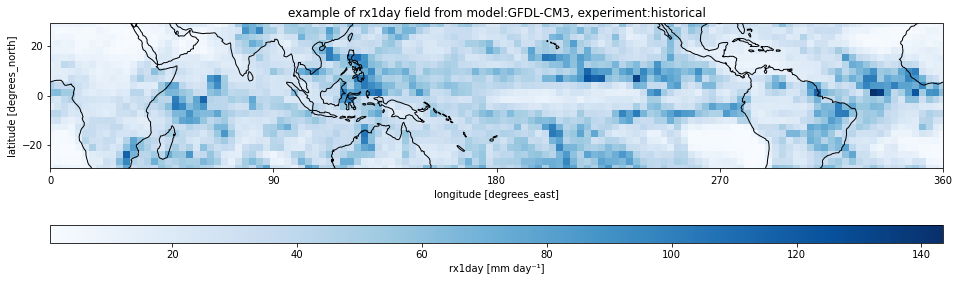

In [6]:
scene = data.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format(rxday_options[0], datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

Text(0, 0.5, 'rx1day [mm day⁻¹]')

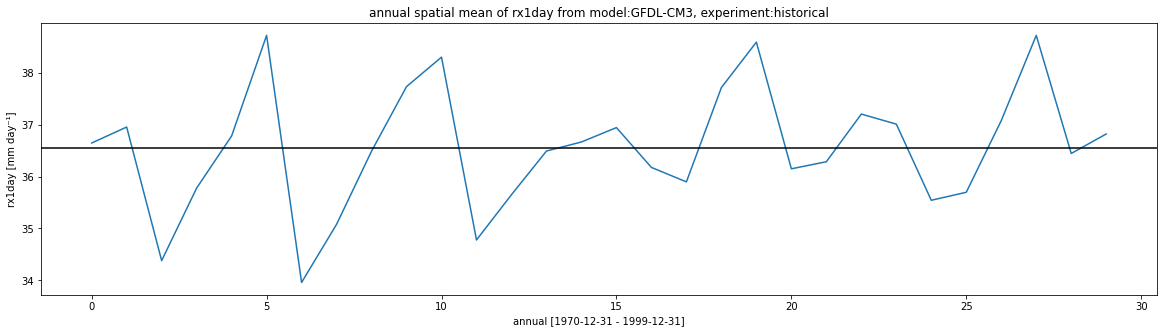

In [7]:
aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))

title = '{} spatial mean of {} from model:{}, experiment:{}'.format('annual', rxday_options[0], datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format('annual', str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format(rxday_options[0], data.units)

plot_timeseries(y, title=title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

### comparing datasets

In [8]:
metric = 'rxday'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    'GPCP' # 20
    ]

datasets = models + observations

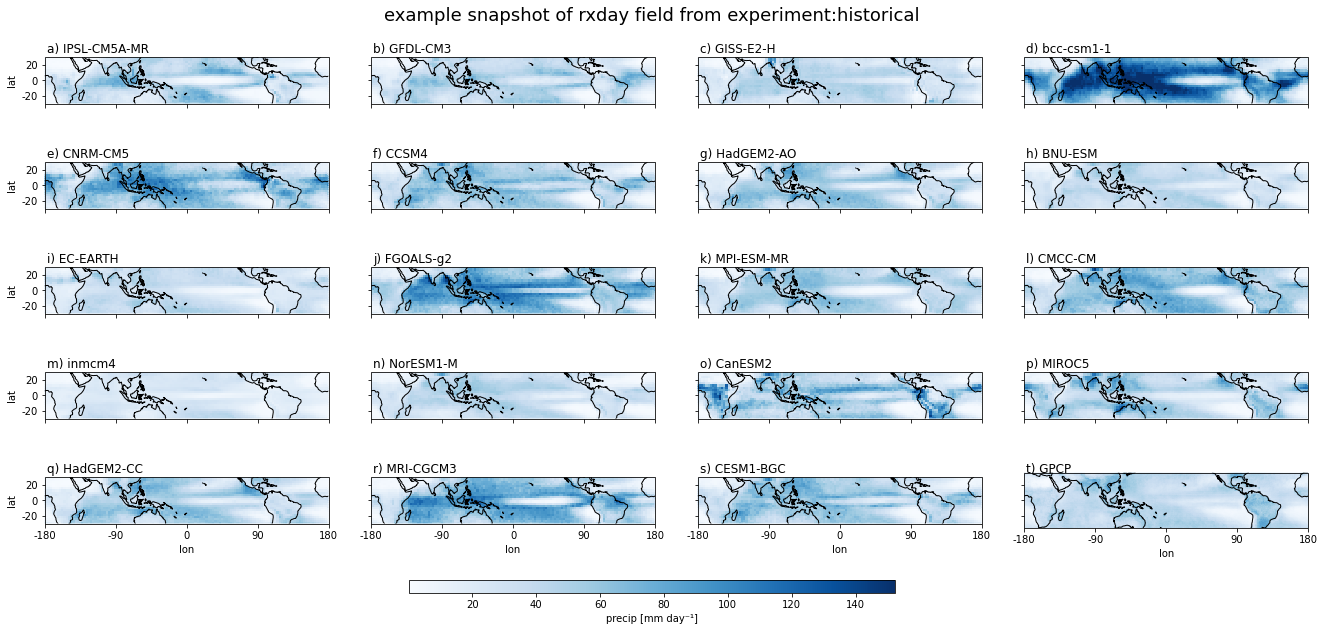

In [9]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_metric(metric, dataset, experiments[0])[rxday_options[0]].mean(dim='time')
        y= data
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format(metric, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_metric(metric, dataset, experiments[0])[rxday_options[0]].mean(dim='time')
    y = data

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precip', 'mm day' + chr(0x207B) + chr(0x00B9) ))

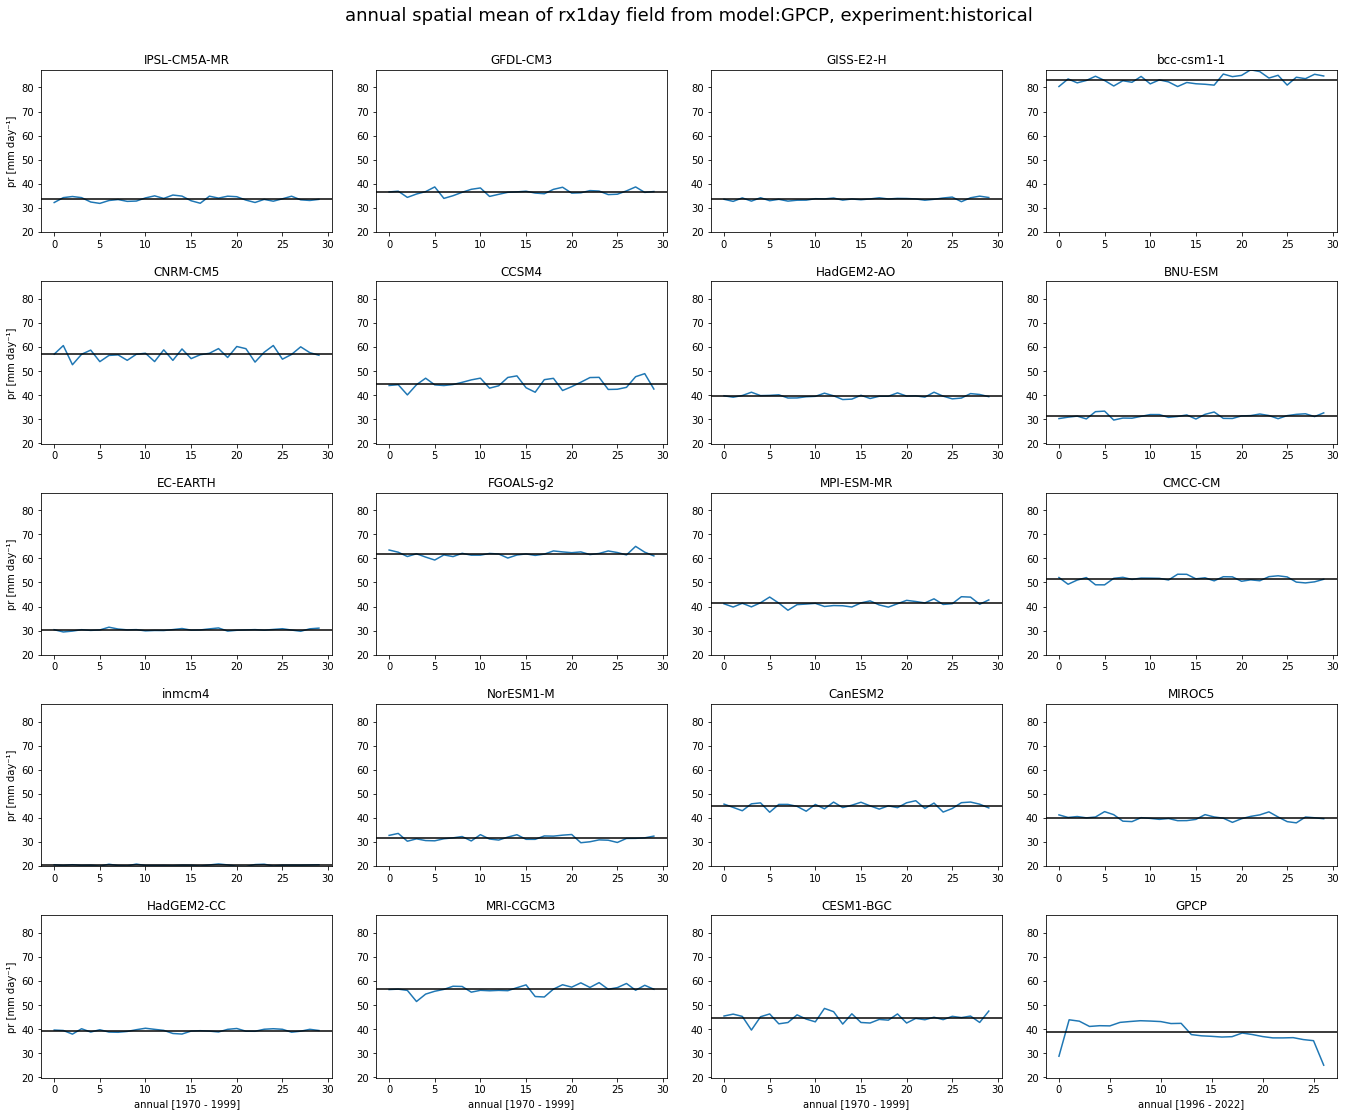

In [10]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_metric(metric, dataset, experiments[0])[rxday_options[0]]
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon'))

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format('annual', rxday_options[0], dataset, experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    ds = get_metric(metric, dataset, experiments[0])
    data = ds[rxday_options[0]]
    aWeights = np.cos(np.deg2rad(data.lat))
    y= data.weighted(aWeights).mean(dim=('lat','lon'))

    title = dataset
    plot_timeseries(y, title=title, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format('annual', str(data.isel(time=0).coords['time'].values)[:4], str(data.isel(time=-1).coords['time'].values)[:4])
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'pr [{}]'.format(data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'precip [mm day⁻¹]')

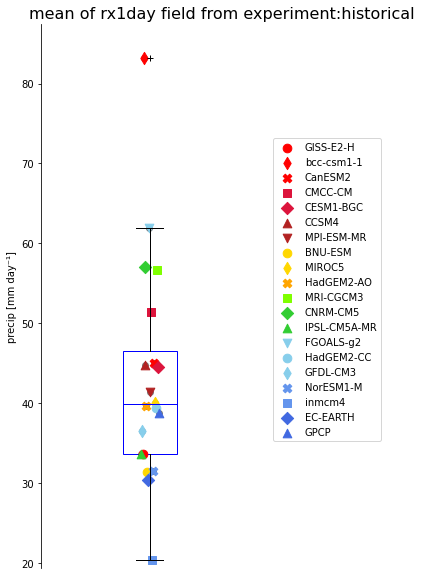

In [13]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC',    # 19
    'GPCP'          # 20
    ]

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']


order_by_tas = True
if order_by_tas:
    order_list = []
    for dataset in datasets:
        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            data = get_metric('tas_tMean', dataset, experiment=experiments[0])['tas_tMean']
            aWeights = np.cos(np.deg2rad(data.lat))
            tas = data.weighted(aWeights).mean(dim=('lat','lon'))
            order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_metric(metric, dataset, experiments[0])[rxday_options[0]]
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('time','lat','lon'))

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'mean of {} field from experiment:{}'.format(rxday_options[0], experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_metric(metric, dataset, experiments[0])[rxday_options[0]]
    aWeights = np.cos(np.deg2rad(data.lat))
    y_data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('precip [{}]'.format('mm day' + chr(0x207B)+ chr(0x00B9)))

### Comparing datasets in a warmer climate

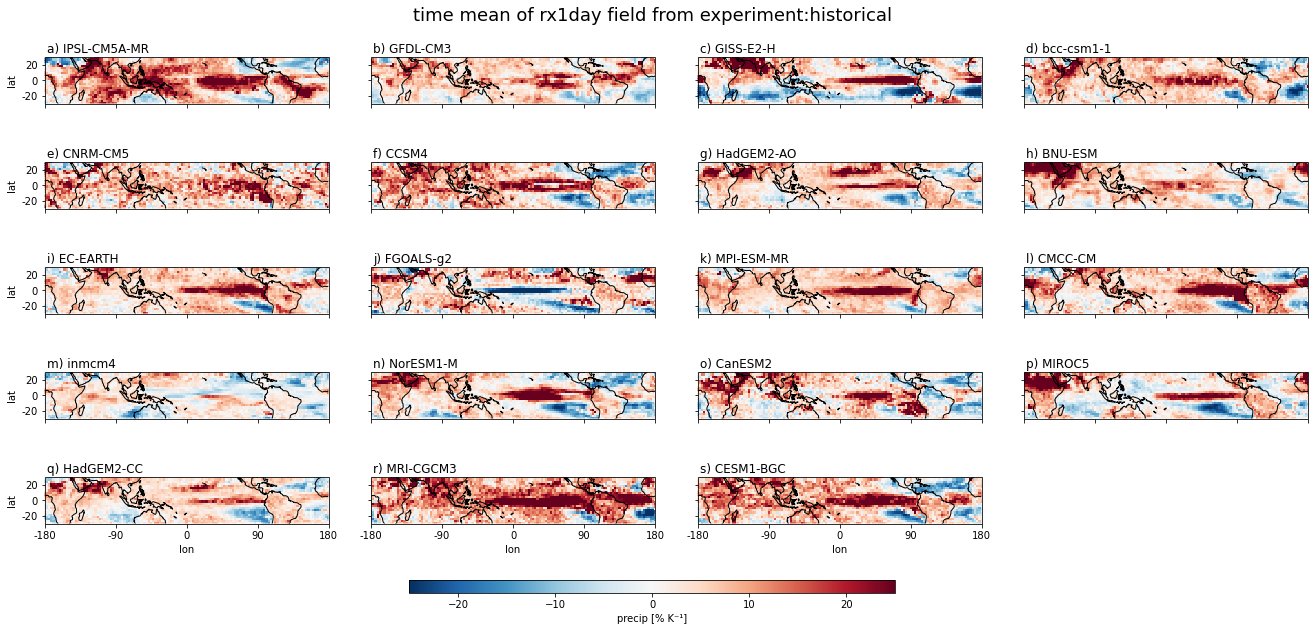

In [11]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        if dataset == 'GPCP':
            continue
        
        data_historical = get_metric(metric, dataset, experiment='historical')[rxday_options[0]].mean(dim='time')
        data_rcp = get_metric(metric, dataset, experiment='rcp85')[rxday_options[0]].mean(dim='time')
        aWeights = np.cos(np.deg2rad(data_historical.lat))

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        
        datadiff = data_rcp - data_historical
        datadiff = (datadiff/data_historical)*100

        tasdiff = tas_rcp85 - tas_historical
        datadiff = datadiff/tasdiff

        y= datadiff

    vmin = np.append(vmin, np.quantile(y, quantile_low))
    vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'time mean of {} field from experiment:{}'.format(rxday_options[0], experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
            
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    if dataset == 'GPCP':
        ax.remove()
        continue

    data_historical = get_metric(metric, dataset, experiment='historical')[rxday_options[0]].mean(dim='time')
    data_rcp = get_metric(metric, dataset, experiment='rcp85')[rxday_options[0]].mean(dim='time')
    aWeights = np.cos(np.deg2rad(data_historical.lat))

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    
    datadiff = data_rcp - data_historical
    datadiff = (datadiff/data_historical)*100

    tasdiff = tas_rcp85 - tas_historical
    datadiff = datadiff/tasdiff

    datadiff.attrs['units'] = '% K'+ chr(0x207B) + chr(0x00B9) 

    y= datadiff
    cmap = 'RdBu_r'

    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])


plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precip', datadiff.units))


Text(0, 0.5, 'precip [% K⁻¹]')

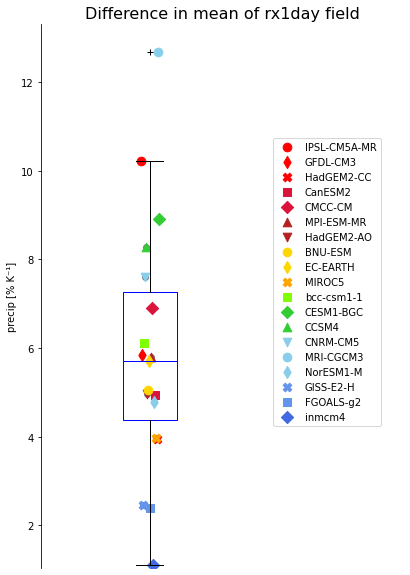

In [17]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tasdiff = True
if order_by_tasdiff:
    order_list = []
    for dataset in datasets:

        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
            aWeights = np.cos(np.deg2rad(tas_historical.lat))

            tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tasdiff = tas_rcp - tas_historical
            order_list = np.append(order_list, tasdiff)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        if dataset == 'GPCP':
            continue
        
        data = get_metric(metric, dataset, experiments[0])[rxday_options[0]]
        aWeights = np.cos(np.deg2rad(data.lat))
        data_historical = get_metric(metric, dataset, experiment='historical')[rxday_options[0]].weighted(aWeights).mean(dim=('time','lat','lon'))
        data_rcp = get_metric(metric, dataset, experiment='rcp85')[rxday_options[0]].weighted(aWeights).mean(dim=('time','lat','lon'))

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical
        datadiff = (datadiff/data_historical)*100

        tasdiff = tas_rcp85 - tas_historical
        datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(6.5,10))
title = 'Difference in mean of {} field'.format(rxday_options[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:

    if dataset == 'GPCP':
        continue

    data = get_metric(metric, dataset, experiments[0])[rxday_options[0]]
    aWeights = np.cos(np.deg2rad(data.lat))
    data_historical = get_metric(metric, dataset, experiment='historical')[rxday_options[0]].weighted(aWeights).mean(dim=('time','lat','lon'))
    data_rcp = get_metric(metric, dataset, experiment='rcp85')[rxday_options[0]].weighted(aWeights).mean(dim=('time','lat','lon'))

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    datadiff = data_rcp - data_historical
    datadiff = (datadiff/data_historical)*100

    tasdiff = tas_rcp85 - tas_historical
    datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('precip [{}]'.format('% K'+ chr(0x207B) + chr(0x00B9)))